<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)


# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
df.isnull().sum()

# Strategy to fill or drop
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# Fill categorical missing values with mode
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction Score by Experience Range:
  Experience_Range  Median_JobSat_Score
0        0-5 years                  5.0
1       6-10 years                 10.0
2      11-20 years                 10.0
3      21-50 years                 10.0
4        50+ years                 13.5


/tmp/ipykernel_4681/3281999862.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('Experience_Range')['JobSatPoints_1'].median().reset_index()
/tmp/ipykernel_4681/3281999862.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


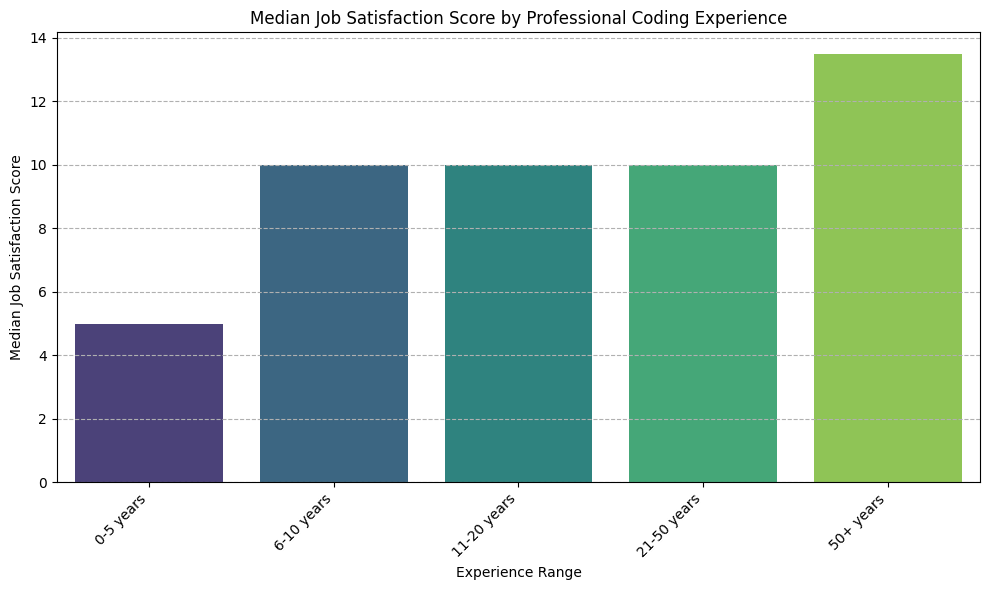

In [6]:
## Write your code here
# Converting the YearCodePro Column
df['YearsCodePro_Clean'] = df['YearsCodePro'].astype(str).str.replace('Less than 1 year', '0.5')
df['YearsCodePro_Clean'] = df['YearsCodePro_Clean'].astype(str).str.replace('More than 50 years', '51')
df['YearsCodePro_Clean'] = pd.to_numeric(df['YearsCodePro_Clean'], errors='coerce')

# Create experience range
bins = [0, 5, 10, 20, 50, df['YearsCodePro_Clean'].max() + 1]
labels = ['0-5 years', '6-10 years', '11-20 years', '21-50 years', '50+ years']
df['Experience_Range'] = pd.cut(df['YearsCodePro_Clean'], bins=bins, labels=labels, right=False)

# Calculate the median
median_jobsat_by_experience = df.groupby('Experience_Range')['JobSatPoints_1'].median().reset_index()
median_jobsat_by_experience.rename(columns={'JobSatPoints_1': 'Median_JobSat_Score'}, inplace=True)
print("Median Job Satisfaction Score by Experience Range:")
print(median_jobsat_by_experience)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Experience_Range',
    y='Median_JobSat_Score',
    data=median_jobsat_by_experience,
    palette='viridis'
)
plt.title('Median Job Satisfaction Score by Professional Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


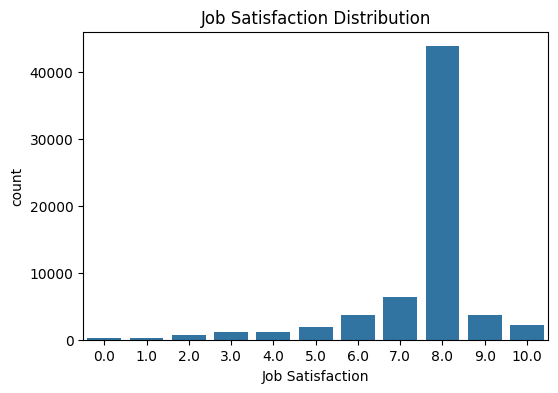

In [7]:
## Write your code here
plt.figure(figsize=(6,4))
sns.countplot(x=df['JobSat'])
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction")
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


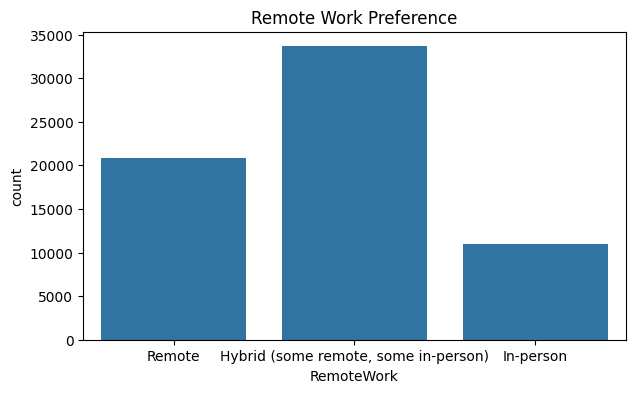

In [8]:
## Write your code here
plt.figure(figsize=(7,4))
sns.countplot(x=df['RemoteWork'])
plt.title("Remote Work Preference")
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_4681/4049441360.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_languages_regional = regional_language_counts.groupby('Country').apply(get_top_n_languages, n=10).reset_index(drop=True)



Top 10 Languages by Top 5 Countries:
    Country                 Language  Count
0    France               JavaScript   1281
1    France                   Python   1186
2    France                 HTML/CSS   1114
3    France                      SQL   1069
4    France               TypeScript    861
5    France  Bash/Shell (all shells)    858
6    France                     Java    706
7    France                        C    594
8    France                      C++    567
9    France                      PHP    520
10  Germany               JavaScript   2732
11  Germany                   Python   2640
12  Germany                 HTML/CSS   2514
13  Germany                      SQL   2297
14  Germany  Bash/Shell (all shells)   1970
15  Germany               TypeScript   1868
16  Germany                     Java   1818
17  Germany                      C++   1315
18  Germany                       C#   1185
19  Germany                        C   1147


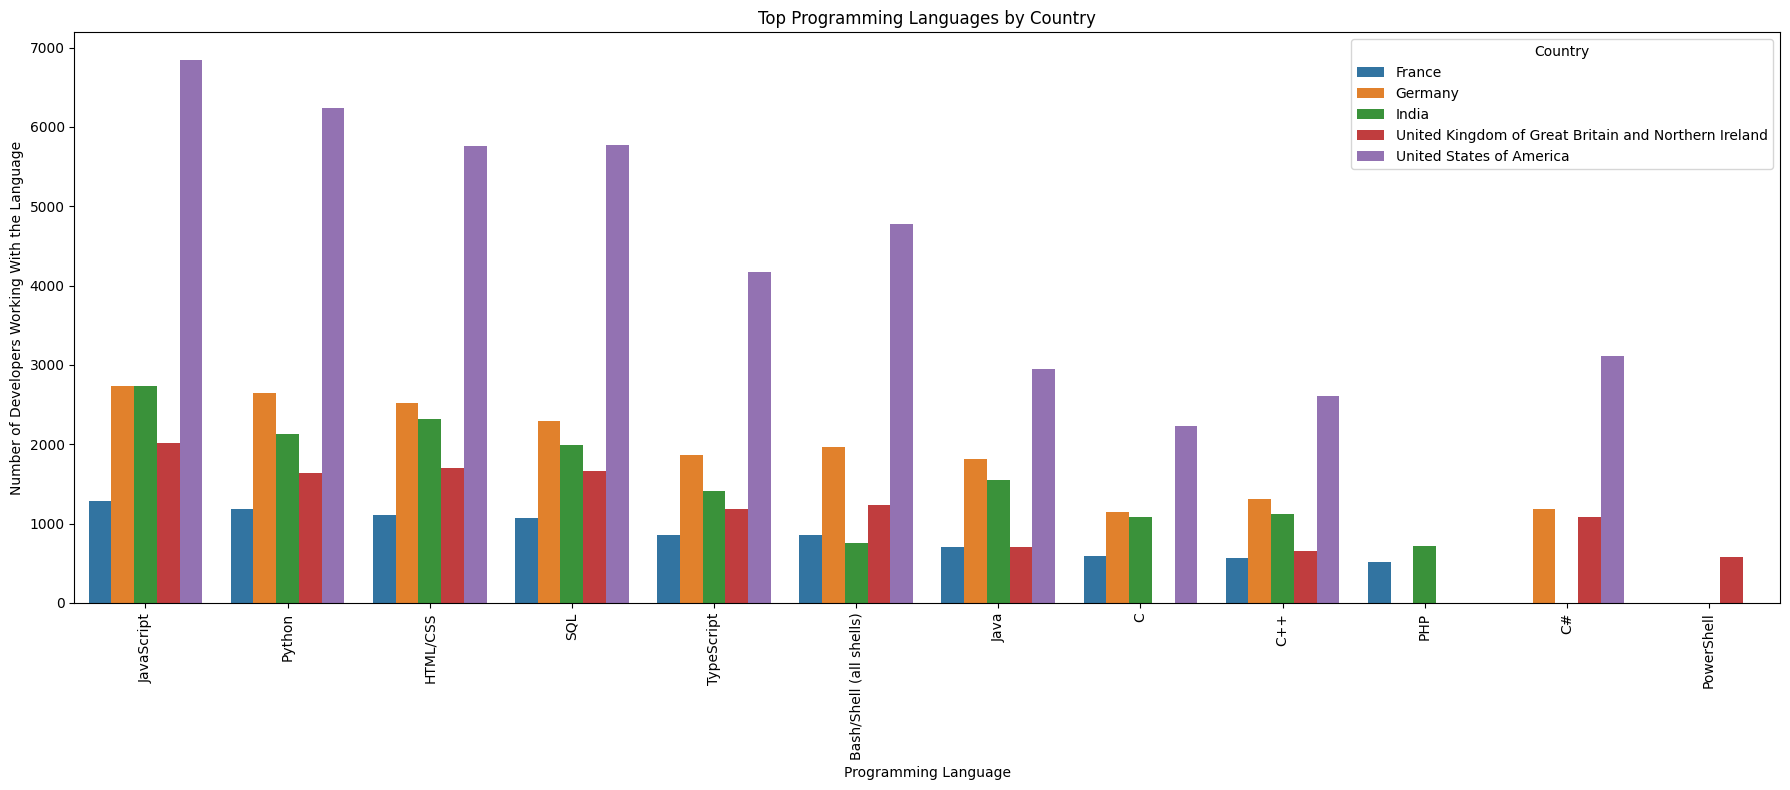

In [9]:
## Write your code here
# Filter country or region
if 'Country' not in df.columns:
    print("Warning: 'Country' column not found. Creating a dummy 'Country' column for execution.")
    # Create a dummy column for demonstration if it's missing
    countries = ['United States', 'India', 'Germany', 'United Kingdom', 'Canada']
    df['Country'] = np.random.choice(countries, size=len(df), p=[0.4, 0.2, 0.15, 0.15, 0.1])

df_lang = df.copy()
df_lang['Language'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('Language')
df_exploded['Language'] = df_exploded['Language'].str.strip()

top_countries = df_exploded['Country'].value_counts().nlargest(5).index.tolist()
df_regional = df_exploded[df_exploded['Country'].isin(top_countries)]

regional_language_counts = df_regional.groupby(['Country', 'Language']).size().reset_index(name='Count')

def get_top_n_languages(group, n=10):
    return group.sort_values(by='Count', ascending=False).head(n)

top_languages_regional = regional_language_counts.groupby('Country').apply(get_top_n_languages, n=10).reset_index(drop=True)

print(f"\nTop 10 Languages by Top 5 Countries:")
print(top_languages_regional.head(20))

plt.figure(figsize=(18, 8))
sns.barplot(
    data=top_languages_regional,
    x='Language',
    y='Count',
    hue='Country',
    palette='tab10'
)
plt.title('Top Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers Working With the Language')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


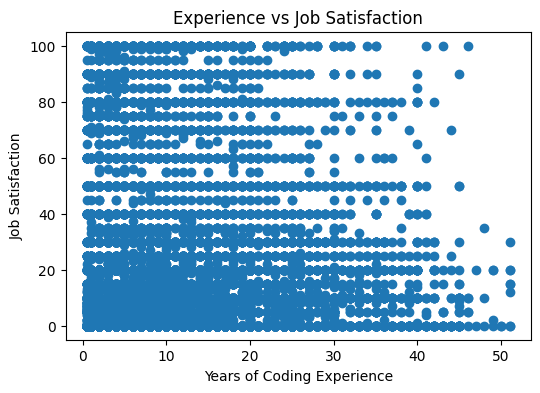

In [13]:
## Write your code here
plt.figure(figsize=(6,4))
plt.scatter(df['YearsCodePro_Clean'], df['JobSatPoints_1'])
plt.title("Experience vs Job Satisfaction")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Job Satisfaction")
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_4681/114828604.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

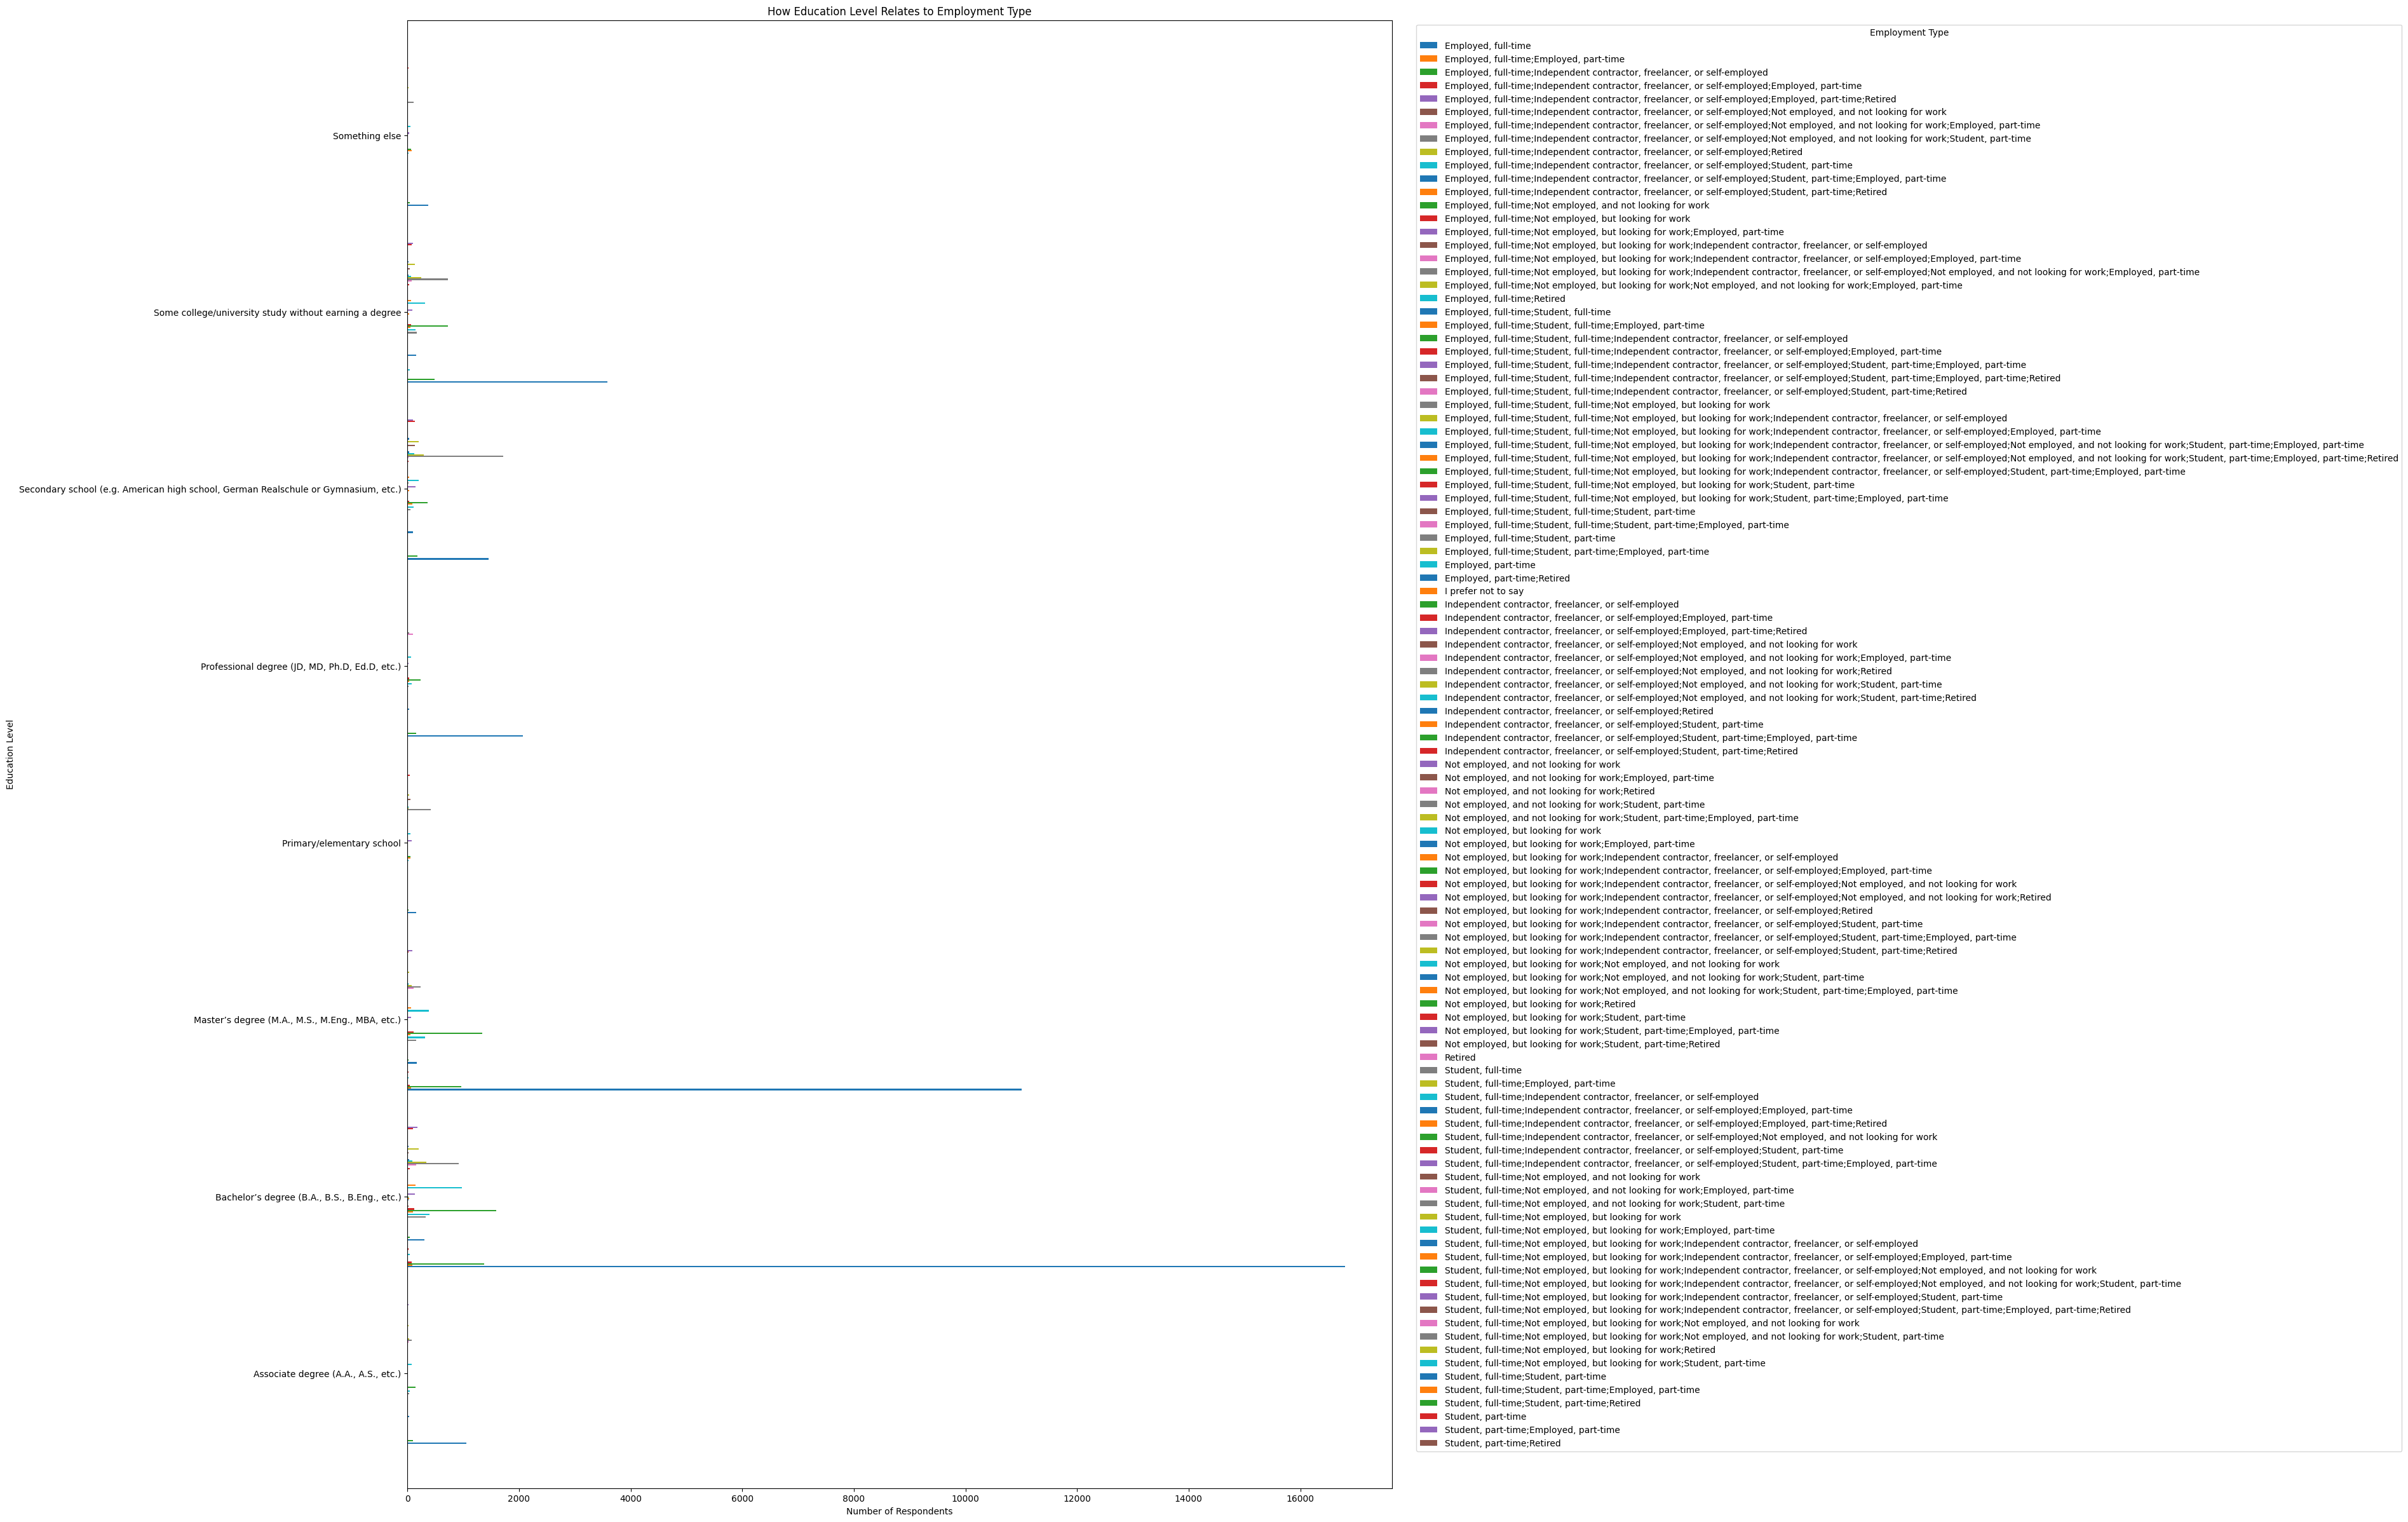

In [14]:
## Write your code here
edu_emp = pd.crosstab(df['EdLevel'], df['Employment'])
plt.figure(figsize=(12, 10))
edu_emp.plot(kind='barh', figsize=(20, 30), width=0.8)

plt.title("How Education Level Relates to Employment Type")
plt.xlabel("Number of Respondents")
plt.ylabel("Education Level")
plt.legend(title="Employment Type", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here
df.to_csv("survey_data_eda_final.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
